In [1]:
import mttime
import os
from pathlib import Path
import pandas as pd
import obspy
from preprocessing_tools import *

Aquí también se quiere realizar la inversión para todos los eventos dentro del catálogo. Sin embargo, no hay forma simple de cargar de vuelta el resultado de la inversión, así que se tiene que realizar cada vez que se quiere observar un resultado concreto.

Si ya se han procesado las observaciones y obtenido los sintéticos correspondientes para cierto evento, únicamente es necesario ejecutar esta libreta para visualizar el resultado.

In [2]:
directorio_recortado = "Datos_Trim/"

catalog_sub = 'catalog.dat'
catalogSSN_Oaxaca = 'catalogSSN_Oaxaca.dat'
catalogSSN_Guerrero = 'catalogSSN_Guerrero.dat'

# Generados durante el preprocesamiento
station_file = "station.csv"
ev_st = "ev_st.csv"

df_catalog = read_catalog(catalogSSN_Oaxaca)
stations_meta = pd.read_csv(station_file)
ev_st_df = pd.read_csv(ev_st)

In [3]:
evid_Oaxaca = "2016.06.27.20.50.35"
evid_Guerrero = "2016.07.19.13.42.46"
evdir = directorio_recortado + evid_Oaxaca

In [4]:
# Call the Configure object to read the input file and set up the inversion
config = mttime.Configure(path_to_file=evdir+"/mtinv.in")

# Quick look at the attributes
print(config)

       event: {'datetime': '2016-06-27T20:50:35.000000Z', 'longitude': -98.0, 'latitude': 16.21}
       depth: [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0]
       green: herrmann
  components: ['Z', 'R', 'T']
      degree: 5
      weight: distance
        plot: False
   correlate: False

| STATION TABLE |
station  distance  azimuth  ts  npts   dt  Z  R  T  longitude  latitude
   CAIG    259.09   291.31  30   128 1.00  1  1  1    -100.27     17.05
   CAIG    259.09   291.31  30   128 1.00  1  1  1    -100.27     17.05
   CAIG    259.09   291.31  30   128 1.00  1  1  1    -100.27     17.05
   HUIG    208.28   103.28  30   128 1.00  1  1  1     -96.11     15.77
   HUIG    208.28   103.28  30   128 1.00  1  1  1     -96.11     15.77
   HUIG    208.28   103.28  30   128 1.00  1  1  1     -96.11     15.77
   OXIG    165.48    54.59  30   128 1.00  1  1  1     -96.73     17.07
   OXIG    165.48    54.59  30   128 1.00  1  1  1     -96.73     17.07
   OXIG    

In [5]:
# Pass the parameters to the Inversion object and launch the inversion
# The default is to plot all solutions
tdmt = mttime.Inversion(config=config)
tdmt.invert()

Deviatoric Moment Tensor Inversion
Depth = 10.0000 km
Mw = 6.25
Percent DC/CLVD/ISO = 82/18/0
VR = 15.16%

Deviatoric Moment Tensor Inversion
Depth = 15.0000 km
Mw = 6.19
Percent DC/CLVD/ISO = 75/25/0
VR = 8.32%

Deviatoric Moment Tensor Inversion
Depth = 20.0000 km
Mw = 6.10
Percent DC/CLVD/ISO = 63/37/0
VR = 4.58%

Deviatoric Moment Tensor Inversion
Depth = 25.0000 km
Mw = 5.87
Percent DC/CLVD/ISO = 44/56/0
VR = 2.77%

Deviatoric Moment Tensor Inversion
Depth = 30.0000 km
Mw = 5.85
Percent DC/CLVD/ISO = 28/72/0
VR = 2.96%

Deviatoric Moment Tensor Inversion
Depth = 35.0000 km
Mw = 6.03
Percent DC/CLVD/ISO = 49/51/0
VR = 4.04%

Deviatoric Moment Tensor Inversion
Depth = 40.0000 km
Mw = 6.13
Percent DC/CLVD/ISO = 57/43/0
VR = 5.54%

Deviatoric Moment Tensor Inversion
Depth = 45.0000 km
Mw = 6.20
Percent DC/CLVD/ISO = 65/35/0
VR = 7.36%

Deviatoric Moment Tensor Inversion
Depth = 50.0000 km
Mw = 6.25
Percent DC/CLVD/ISO = 73/27/0
VR = 9.32%

Deviatoric Moment Tensor Inversion
Depth = 55

# Verificar si polaridad es correcta

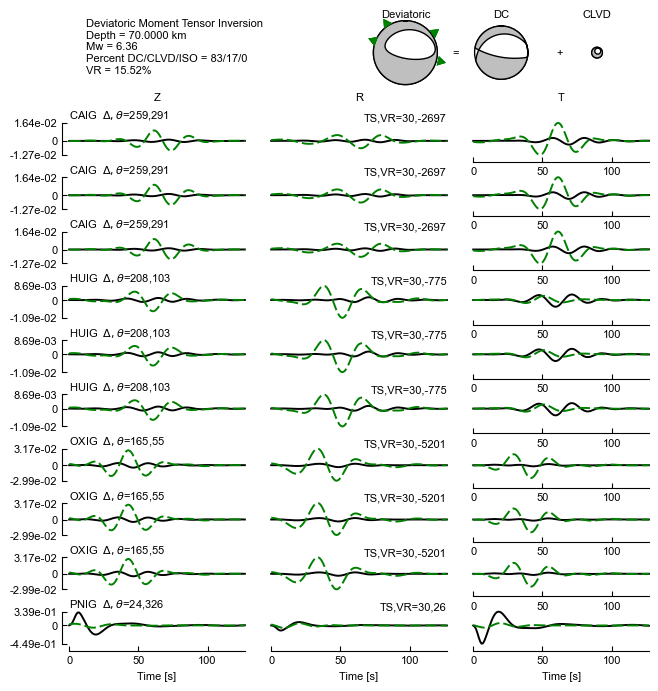

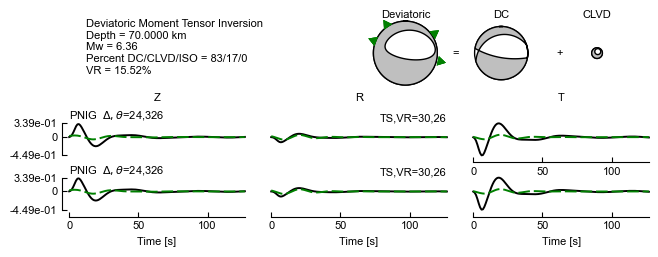

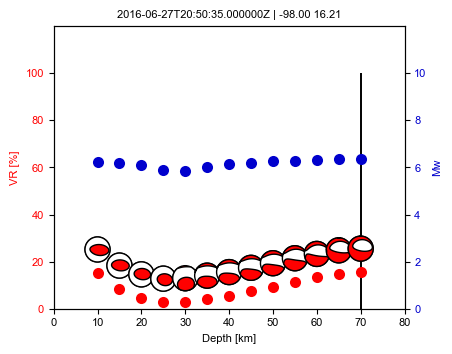

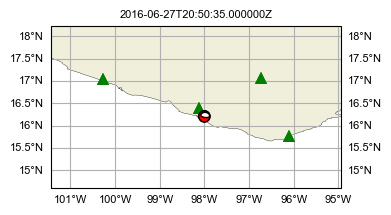

In [6]:
# To save figure to file set show=False

# Plot waveform fits of the best solution (highest VR)
tdmt.plot(view="waveform", option="preferred", show=True) # Ajuste de forma de onda
tdmt.plot(view="depth", show=True) # Solucion en funcion de la profundidad
tdmt.plot(view="map", show=True) # Solucion en un mapa

Full Moment Tensor Inversion
Depth = 10.0000 km
Mw = 6.26
Percent DC/CLVD/ISO = 82/18/0
VR = 15.16%

Full Moment Tensor Inversion
Depth = 15.0000 km
Mw = 6.26
Percent DC/CLVD/ISO = 67/2/31
VR = 10.06%

Full Moment Tensor Inversion
Depth = 20.0000 km
Mw = 6.26
Percent DC/CLVD/ISO = 45/10/45
VR = 6.49%

Full Moment Tensor Inversion
Depth = 25.0000 km
Mw = 6.23
Percent DC/CLVD/ISO = 24/19/57
VR = 4.61%

Full Moment Tensor Inversion
Depth = 30.0000 km
Mw = 6.20
Percent DC/CLVD/ISO = 9/32/59
VR = 4.15%

Full Moment Tensor Inversion
Depth = 35.0000 km
Mw = 6.23
Percent DC/CLVD/ISO = 21/32/47
VR = 4.65%

Full Moment Tensor Inversion
Depth = 40.0000 km
Mw = 6.23
Percent DC/CLVD/ISO = 38/34/27
VR = 5.71%

Full Moment Tensor Inversion
Depth = 45.0000 km
Mw = 6.22
Percent DC/CLVD/ISO = 61/34/5
VR = 7.37%

Full Moment Tensor Inversion
Depth = 50.0000 km
Mw = 6.30
Percent DC/CLVD/ISO = 64/21/15
VR = 9.37%

Full Moment Tensor Inversion
Depth = 55.0000 km
Mw = 6.38
Percent DC/CLVD/ISO = 65/9/26
VR = 

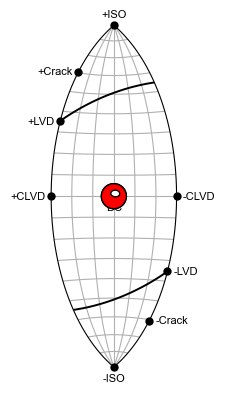

In [7]:
# Compute full moment tensor and plot the result on the lune.
config = mttime.Configure(path_to_file=evdir+"/mtinv.in", degree=6)
tdmt = mttime.Inversion(config=config)
tdmt.invert()
tdmt.plot(view="lune", show=True)

In [7]:
# Finally save the results to file.
# Default is to save all the results
tdmt.write()

# Setting option to 'preferred' will only save the best solution
tdmt.write(option="preferred")